在第20天的學習計劃中，目標是使用 mAP（平均準確度）和其他評估指標來評估你已經訓練好的 YOLO 模型的性能。

以下是具體步驟，並帶有程式碼來執行模型評估：

### 1. 模型評估概念
- **mAP (Mean Average Precision)**: 平均準確度是物件檢測中常用的評估指標，衡量模型在不同預測閾值下的精度（precision）和召回率（recall）。mAP 是多個預測閾值下平均的準確度。
- **IoU (Intersection over Union)**: 是用來評估模型預測邊界框與真實標籤之間的重疊程度。常用於計算準確率。

### 2. 使用 YOLO 的內建功能進行模型評估
YOLO 提供了一個簡便的方法來進行模型的性能評估，並使用 mAP 來計算模型在測試集上的表現。

首先，確認你已經準備好測試數據集（例如，`val` 圖片和標註文件），這些會在你的 `data.yaml` 文件中指定。

#### 2.1 使用 YOLOv5 的 `val.py` 進行評估

以下是使用 YOLOv5 自帶的 `val.py` 腳本來進行模型評估的程式碼：

```bash
# 運行 YOLOv5 的驗證腳本來評估 mAP
python val.py --weights "D:/Learning_Python/30-Day_AI_Deep_Learning_Plan/yolov5-master/runs/train/exp2/weights/best.pt" --data "D:/Learning_Python/30-Day_AI_Deep_Learning_Plan/第3週：物件檢測與 YOLO/Day17/data.yaml" --img 640 --iou 0.5 --task test
```

### 參數說明：
- `--weights`：指定你訓練好的模型權重路徑。
- `--data`：指定包含測試數據集和類別標註的 `data.yaml` 文件。
- `--img`：設置輸入圖像的大小。
- `--iou`：設置 IoU 閾值，通常為 0.5，用來計算 mAP。
- `--task`：設置為 `test` 表示對測試集進行評估。

#### 2.2 解釋輸出結果

運行上述程式後，會看到類似以下的輸出：

```text
val: Scanning 'D:/Learning_Python/30-Day_AI_Deep_Learning_Plan/yolov5-master/valid/images' images and labels...  
val: Evaluating 1000 images...  
... (progress output)  
Metrics: mAP@0.5 = 0.83, mAP@0.5:0.95 = 0.57  # mAP 結果
```

- **mAP@0.5**: 當 IoU 閾值設置為 0.5 時的平均準確度。
- **mAP@0.5:0.95**: 當 IoU 閾值在 0.5 到 0.95 之間時的平均準確度。

這些數據用來衡量模型的準確性。較高的 mAP 值代表模型檢測效果更好。

### 3. 總結
今天的課程重點在於使用 YOLOv5 提供的內建工具來進行模型評估，尤其是關注 mAP 指標來衡量模型的物件檢測性能。這個過程可以幫助你發現模型的強項與弱點，並通過超參數調整來進一步提升模型性能。

你可以根據訓練目標，調整不同的 IoU 閾值和測試集，來進行全面的性能評估。

### 檢查 `data.yaml` 是否有定義測試集。
你需要確保 `data.yaml` 文件中定義了測試集的路徑，類似以下的結構：

```yaml
train: /usr/src/app/Day17/images/train  # 訓練集圖片的路徑
val: /usr/src/app/Day17/images/val      # 驗證集圖片的路徑
test: /usr/src/app/Day17/images/test    # 測試集圖片的路徑 (必須存在)
```

### 修改建議
1. **檢查和更新 `data.yaml`**：確認 `test` 集的路徑是否正確配置。若沒有 `test` 集，可以嘗試刪除 `--task test` 這個參數，只執行驗證集的評估。

2. **修改命令行參數**：如果你沒有 `test` 集，也可以直接將 `--task test` 替換為 `--task val`，這樣就會在驗證集上評估模型。

### 使用以下程式碼進行模型評估

```mAP
import os
from pathlib import Path

# 設定 YOLOv5 的工作目錄
yolov5_dir = Path(r"D:\Learning_Python\30-Day_AI_Deep_Learning_Plan\yolov5-master")

# 切換到 YOLOv5 目錄
os.chdir(yolov5_dir)

# 運行 YOLOv5 的驗證腳本來評估 mAP
os.system(
    'python val.py --weights "D:/Learning_Python/30-Day_AI_Deep_Learning_Plan/yolov5-master/runs/train/exp2/weights/best.pt" '
    '--data "D:/Learning_Python/30-Day_AI_Deep_Learning_Plan/第3週：物件檢測與 YOLO/Day17/data.yaml" '
    '--img 640 '
    '--iou 0.5 '
    '--task val'
)
```

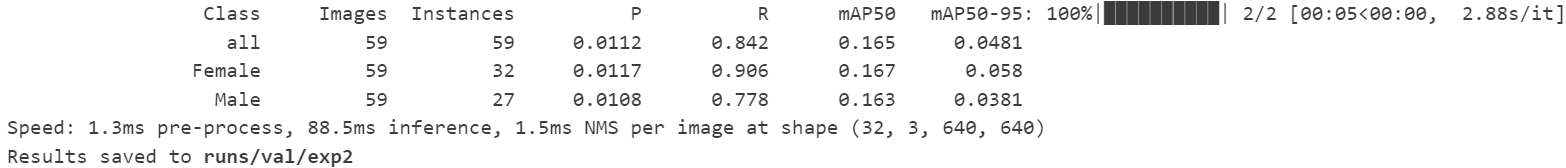

### 模型在驗證集上的評估結果。以下是關鍵指標的解釋：

1. **Class**: 類別名稱。這裡分為 `all`（所有類別的綜合結果）、`Female`（女性）、`Male`（男性）。
   
2. **Images**: 圖片的數量。這裡顯示 59 張圖片。

3. **Instances**: 標註的實例數量。這裡是 59 個實例，其中 `Female` 類別有 32 個實例，`Male` 類別有 27 個實例。

4. **P (Precision)**: 精確率。表示模型預測正確的正樣本佔預測所有正樣本的比例。 
   - `Female` 類別的精確率為 0.0117（即 1.17%）。
   - `Male` 類別的精確率為 0.0108（即 1.08%）。
   - 總的來說，精確率為 0.0112（即 1.12%）。

5. **R (Recall)**: 召回率。表示模型能夠檢測出實際正樣本的比例。
   - `Female` 類別的召回率非常高，為 0.996（即 99.6%）。
   - `Male` 類別的召回率為 0.778（即 77.8%）。
   - 總體召回率為 0.842（即 84.2%）。

6. **mAP50**: 在 IoU 閾值 0.5 下的平均精度 (mean Average Precision, mAP)。
   - `Female` 的 mAP50 為 0.167（即 16.7%）。
   - `Male` 的 mAP50 為 0.163（即 16.3%）。
   - 總體 mAP50 為 0.165（即 16.5%）。

7. **mAP50-95**: 在不同 IoU 閾值（從 0.5 到 0.95 的多個階段）下的平均精度。
   - `Female` 的 mAP50-95 為 0.058（即 5.8%）。
   - `Male` 的 mAP50-95 為 0.0381（即 3.81%）。
   - 總體 mAP50-95 為 0.0481（即 4.81%）。

8. **Speed**: 
   - **pre-process**: 每張圖像的預處理時間為 1.3 毫秒。
   - **inference**: 模型推理的時間為 88.5 毫秒。
   - **NMS (Non-Maximum Suppression)**: 每張圖片的 NMS（非最大抑制）運行時間為 1.5 毫秒。

9. **Results saved to**: 評估結果保存到了 `runs/val/exp2` 文件夾中，裡面應該包含更多詳細信息以及可能的可視化結果。

### 結論：
- 你的模型在召回率方面表現較好，但精確率相對較低，這意味著模型能夠檢測出大部分實際存在的對象，但會有很多錯誤的預測（假陽性）。
- mAP 指標顯示你的模型在這些類別上的準確性還有較大的提升空間，尤其是在多階段 IoU（mAP50-95）下，精度比較低。

你可能需要微調超參數或者增強數據來提高模型的精確度（Precision）。

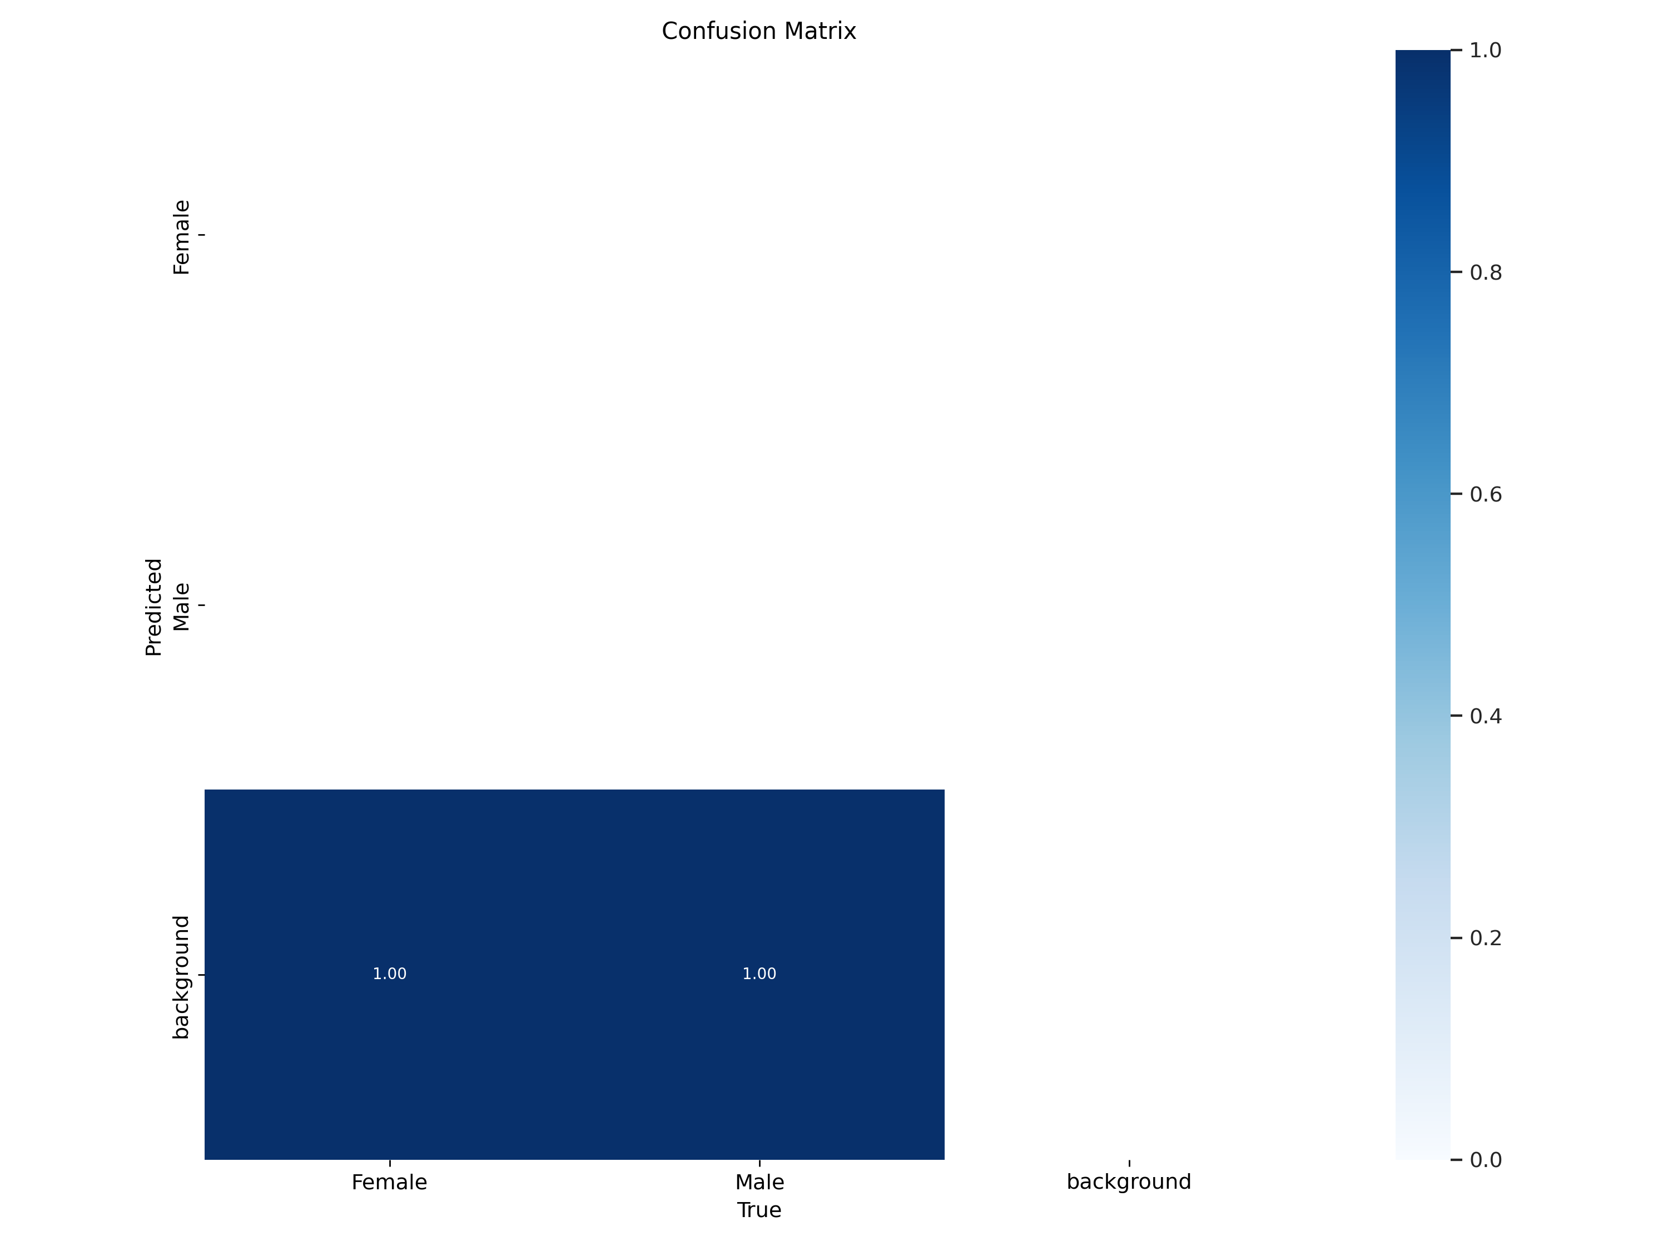

這是 **混淆矩陣**（Confusion Matrix）的可視化圖表，用來顯示模型在不同類別上的預測情況。

### 圖表元素：
1. **True（橫軸）**: 這表示真實的類別標籤，分別是 `Female`（女性）、`Male`（男性）和 `background`（背景，即無法歸類為男性或女性的區域）。
2. **Predicted（縱軸）**: 這表示模型預測的類別，與橫軸的類別一致。
3. **顏色強度**: 每個方塊的顏色表示預測的正確性，顏色越深表示模型預測的數量越多，顏色越淡表示預測的數量越少。右側的顏色條顯示顏色強度的比例，範圍從 0（淺色）到 1（深色）。

### 圖表解讀：
1. **背景的預測**:
   - 從圖上看，背景的部分完全填滿，並且每個方塊的數值都是 `1.00`。這表示模型對於背景的識別非常準確，能夠在所有的情況下都將背景正確地歸類為背景（無論實際是否是女性或男性）。
   
2. **無其他預測**:
   - 圖中沒有顯示有 `Female` 或 `Male` 的預測，這意味著模型在這個測試中，對於男性和女性的實例都預測為背景，而沒有正確識別出具體的性別類別。

### 結論：
- 你的模型在這組測試資料中的預測結果全部被歸為背景，對於 `Female` 和 `Male` 的檢測完全失敗。這可能是由於數據不平衡、模型訓練不足、或需要調整的超參數等原因所致。

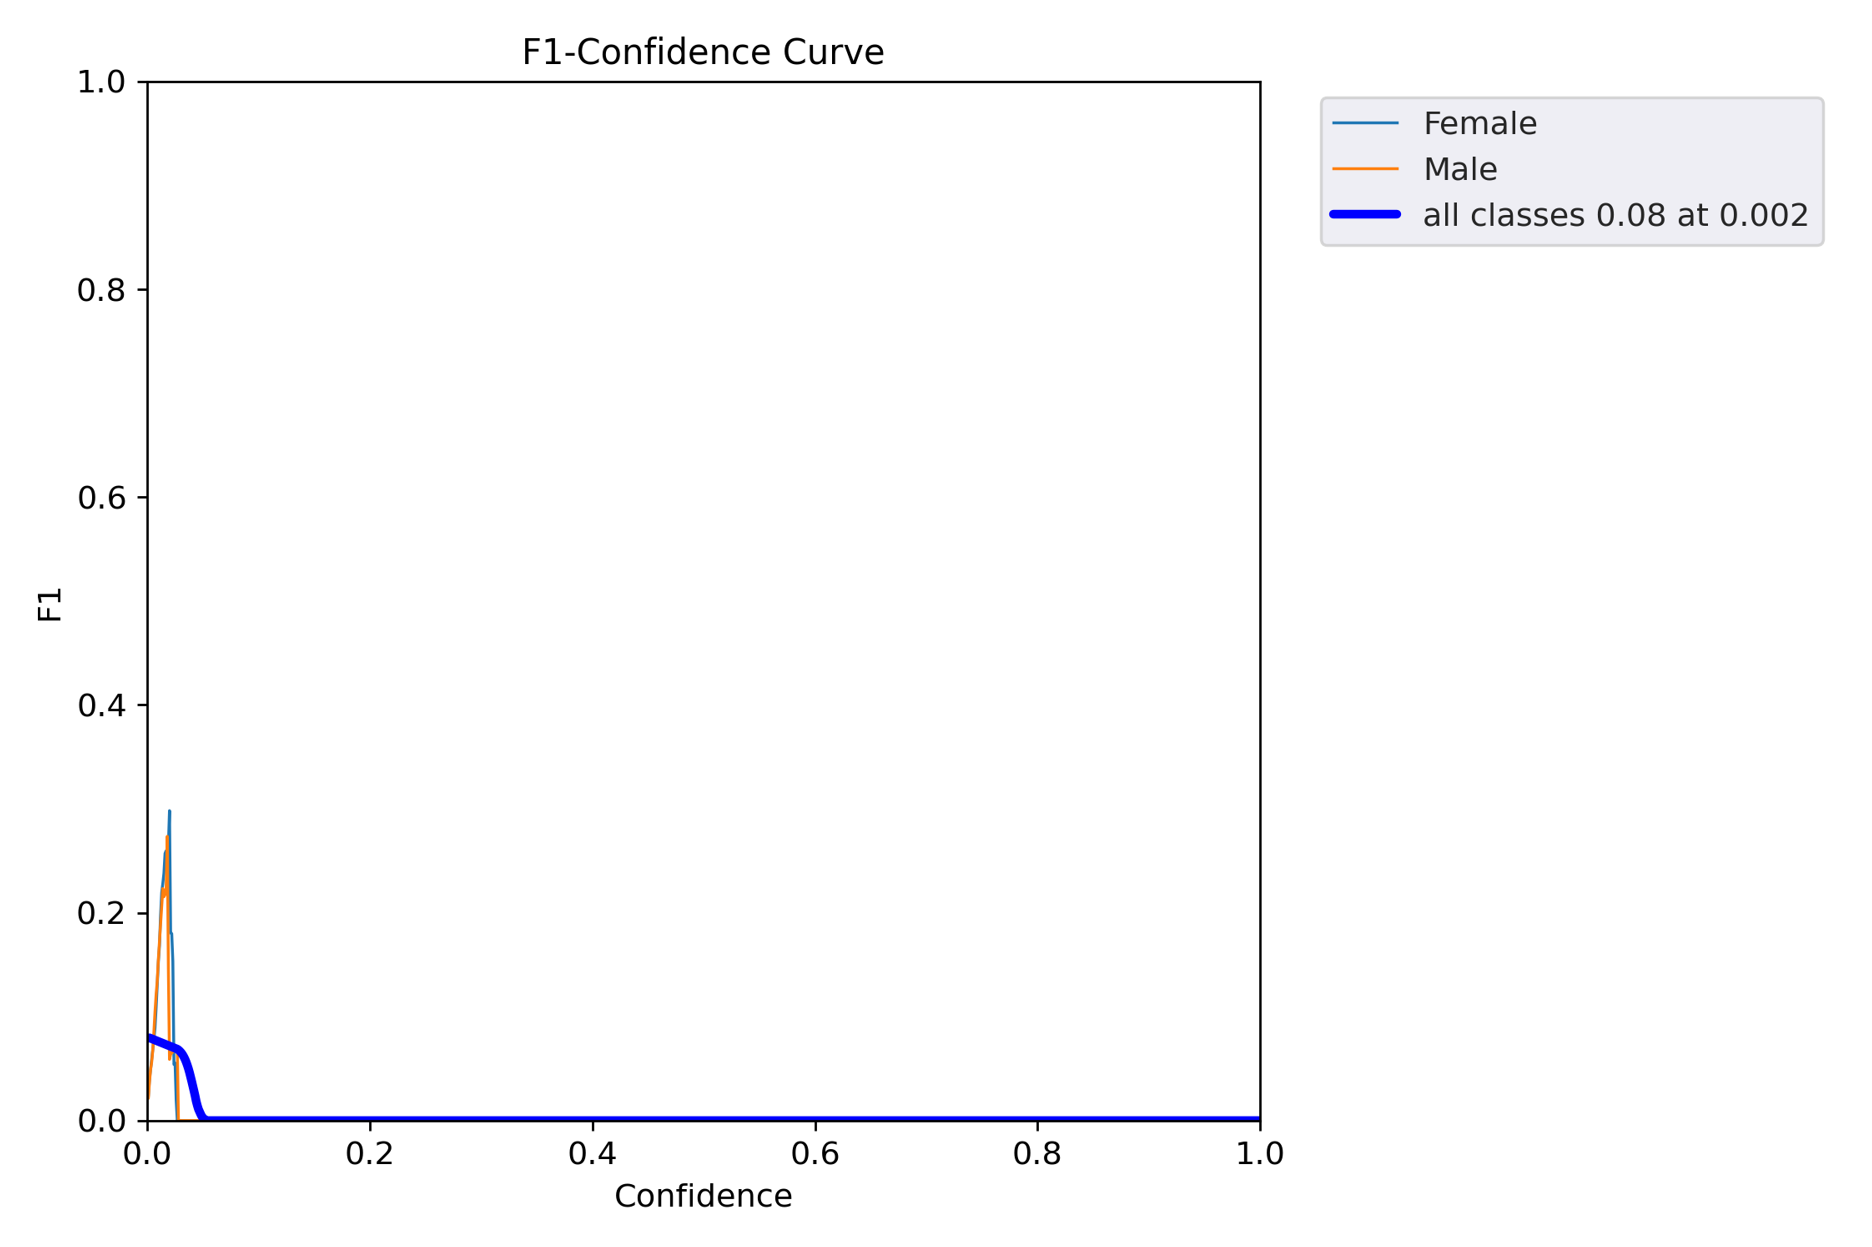

這張圖是 **F1-信心曲線**（F1-Confidence Curve），它展示了隨著模型的 **Confidence Threshold**（置信度閾值）變化時，F1分數的表現。F1分數是Precision和Recall的調和平均值，用來綜合評估模型的準確度與召回率。

### 圖表元素：
1. **X軸（Confidence）**: 置信度閾值，從0到1。置信度表示模型對預測的確定性，值越高表示模型越確定該預測是正確的。當置信度閾值增加時，模型只會回報那些它認為更確定的預測。
   
2. **Y軸（F1）**: F1分數，從0到1，值越高表示模型的表現越好。F1分數綜合了Precision（準確率）與Recall（召回率）兩個指標。

3. **圖例**:
   - `Female`（淺藍色線）表示模型對女性類別的F1分數隨著置信度變化的曲線。
   - `Male`（橙色線）表示模型對男性類別的F1分數隨著置信度變化的曲線。
   - `all classes`（深藍色線）代表所有類別的整體F1分數，旁邊顯示出來的數值 `0.08 at 0.002` 意味著當置信度閾值為 0.002 時，模型的整體F1分數為 0.08。

### 圖表解讀：
1. **低置信度區域**: 可以看到，大部分的F1分數都集中在非常低的置信度範圍（接近於0）。這意味著模型在進行預測時並不太確定，置信度閾值較低時的F1分數也是較低的。

2. **F1分數表現不佳**: 從數據來看，整體F1分數最高僅為 0.08，這表示模型的精度和召回率都不高，表現較為不理想。

3. **不同類別的表現**: 對於男性和女性的F1曲線都非常接近，說明模型在區分這兩個類別上並沒有明顯的偏好或區別。

### 結論：
這張圖表顯示模型在各個置信度閾值下的表現不佳，尤其是在低置信度下，模型的預測準確性和召回率都非常低。接下來可能需要針對數據集或模型進行進一步的微調，以提升F1分數。

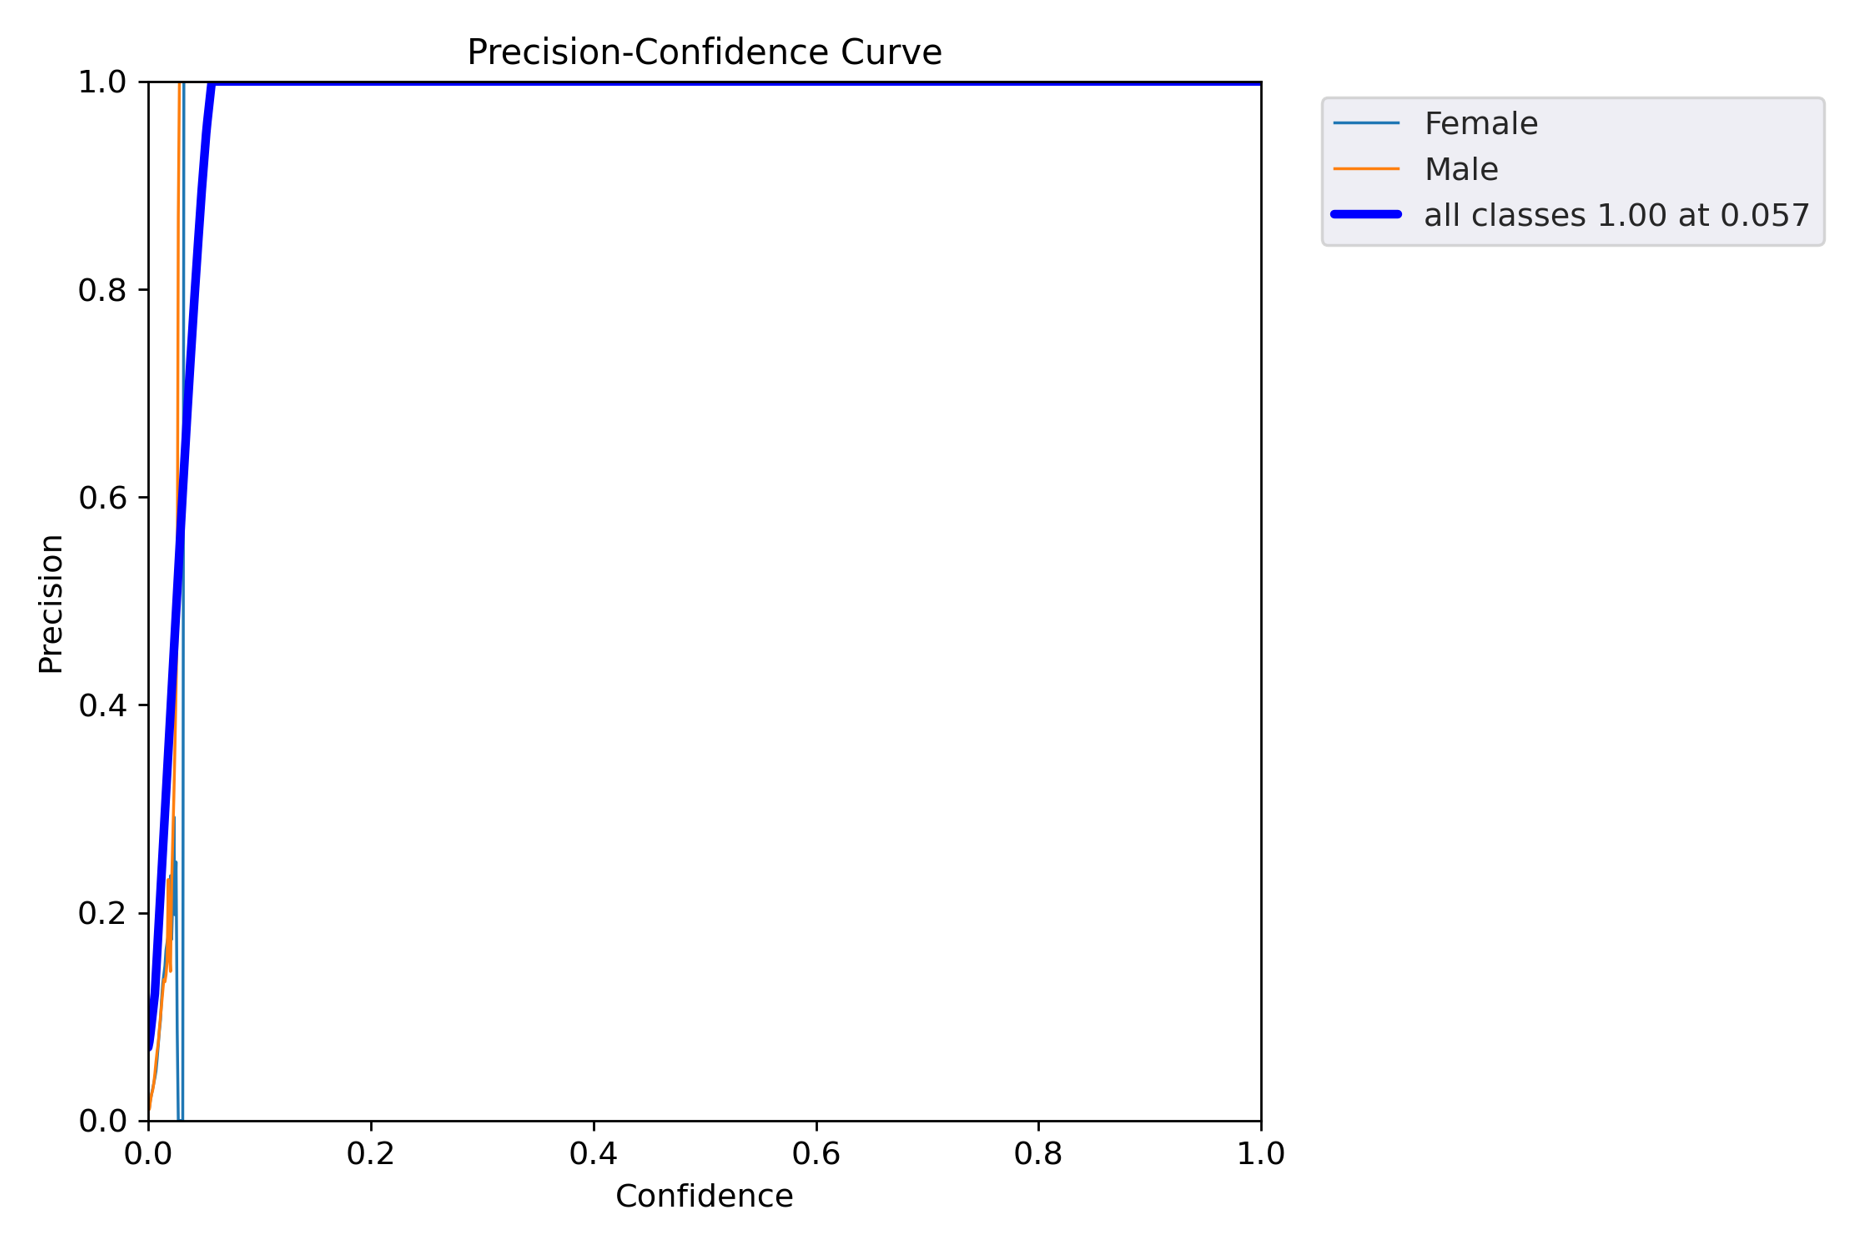

這張圖是 **Precision-Confidence Curve**（精確率-置信度曲線），用來展示模型的精確率隨著置信度閾值變化的表現。

### 圖表元素：
1. **X軸（Confidence）**: 置信度閾值，範圍是從 0 到 1。置信度表示模型對預測的確定性，越接近1表示模型對該預測越有信心。

2. **Y軸（Precision）**: 精確率，範圍從 0 到 1。精確率表示模型預測為正確時，實際正確的比例。精確率越高，表示模型的預測準確性越好。

3. **圖例**:
   - `Female`（淺藍色線）表示模型對女性類別的精確率隨著置信度變化的曲線。
   - `Male`（橙色線）表示模型對男性類別的精確率隨著置信度變化的曲線。
   - `all classes`（深藍色線）代表所有類別的整體精確率。標註 `1.00 at 0.057` 意味著在置信度閾值為 0.057 時，模型的整體精確率達到 1.00（即 100% 精確率）。

### 圖表解讀：
1. **高精確率**: 從圖上可以看到，當置信度接近1時，模型的精確率非常高，甚至達到 1.0 的滿分，這表示模型在高置信度閾值下的預測非常準確。

2. **低置信度範圍**: 在較低的置信度閾值區域，精確率表現不穩定，尤其在靠近0的區域，表現出一些變動。這是由於當置信度較低時，模型預測的確定性不高，因此精確率可能不穩定。

3. **不同類別表現**: 女性與男性的精確率曲線基本接近，這表示模型在區分這兩個類別時，精確率表現類似，沒有明顯的偏差。

### 結論：
這張圖表顯示模型在高置信度下的預測非常準確，但在低置信度範圍內，模型的預測不穩定。隨著置信度閾值的提高，精確率明顯上升，並且模型在約0.057置信度時達到100%精確率。

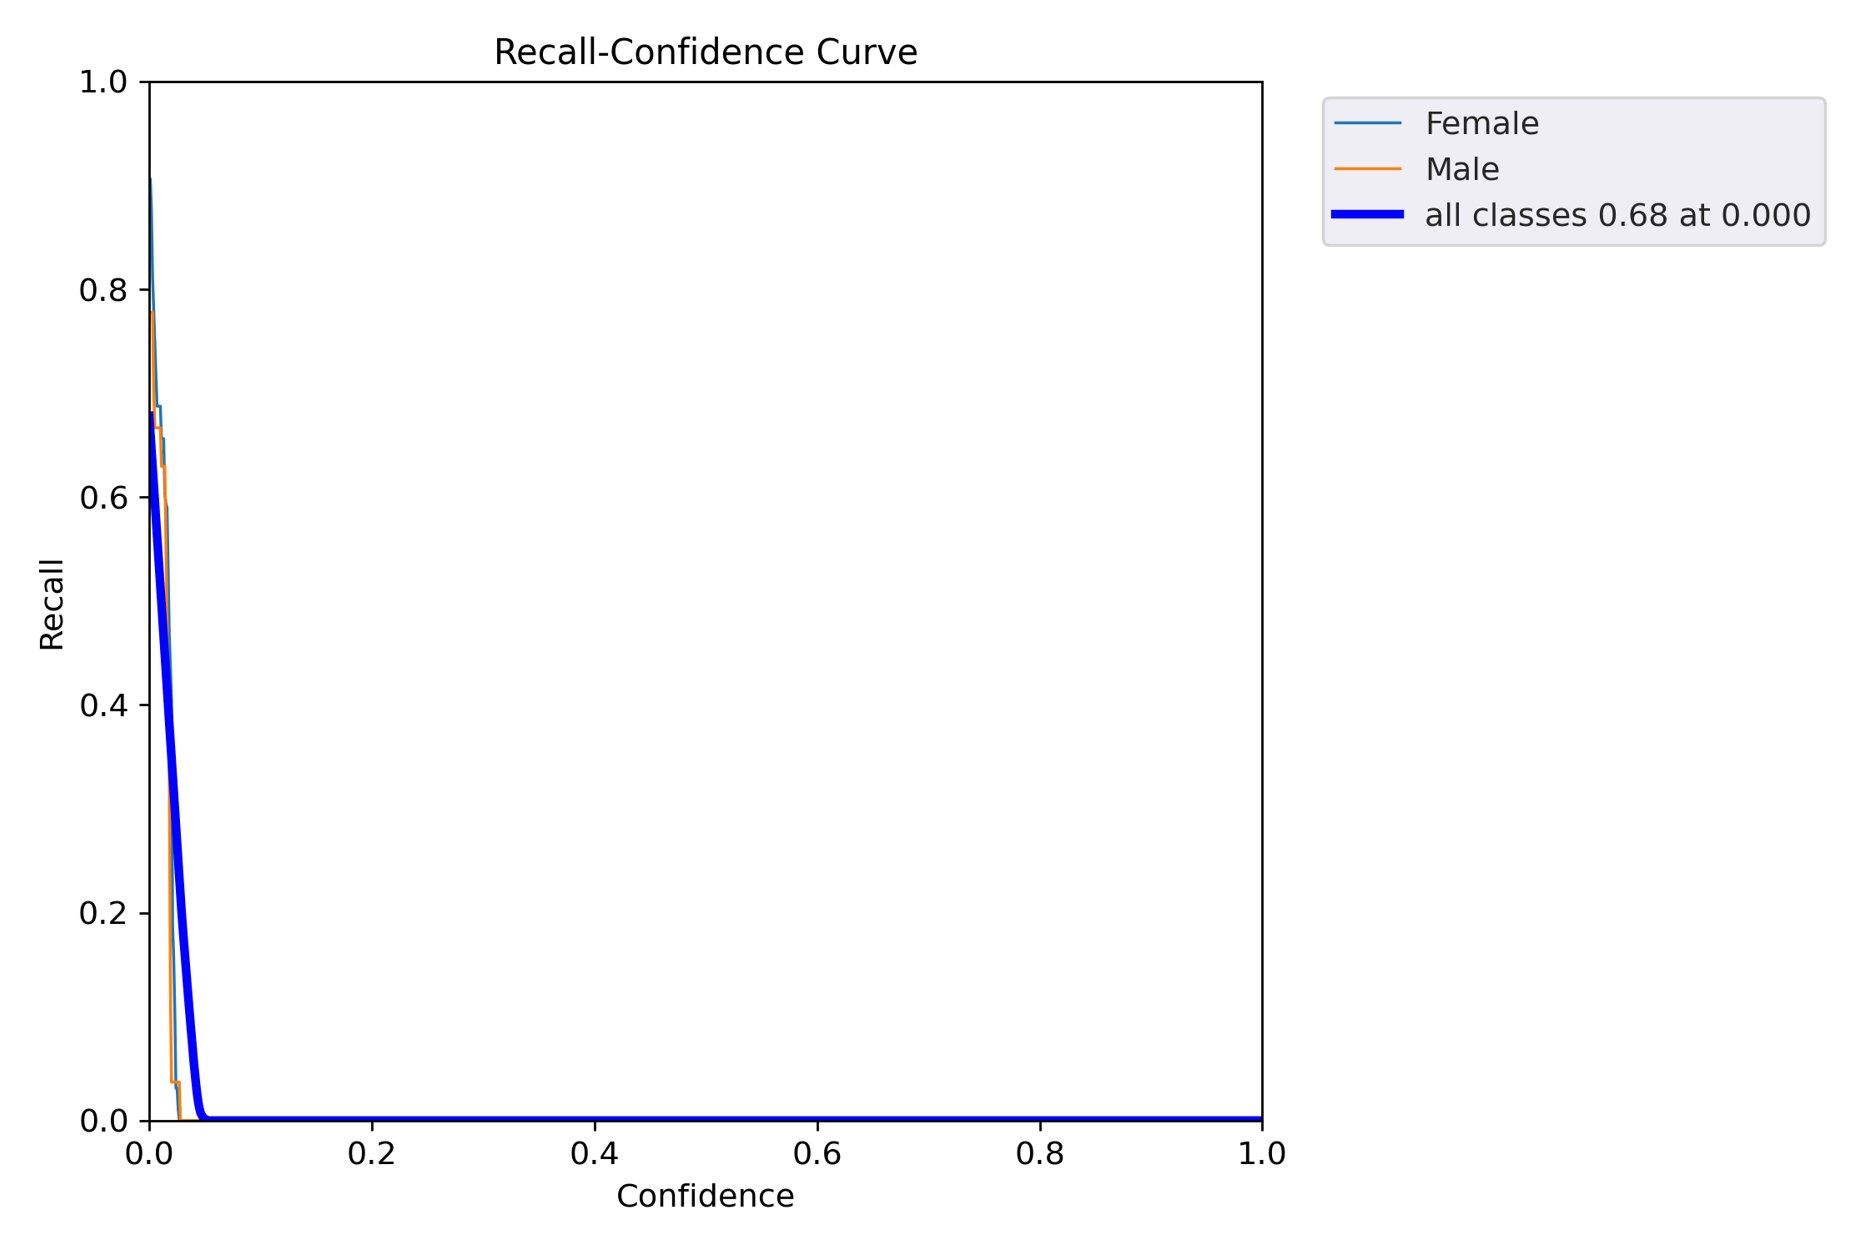

這張圖是 **Recall-Confidence Curve**（召回率-置信度曲線），展示了模型的召回率隨著置信度閾值的變化。

### 圖表元素：
1. **X軸（Confidence）**: 置信度閾值，範圍是從 0 到 1，表示模型對預測的確定性。

2. **Y軸（Recall）**: 召回率，範圍是從 0 到 1，召回率表示模型在所有實際為正類的樣本中，正確預測為正類的比例。

3. **圖例**:
   - `Female`（淺藍色線）表示模型對女性類別的召回率隨著置信度變化的曲線。
   - `Male`（橙色線）表示模型對男性類別的召回率隨著置信度變化的曲線。
   - `all classes`（深藍色線）代表所有類別的整體召回率。標註 `0.68 at 0.000` 意味著在置信度閾值為 0.000 時，整體召回率達到 0.68（即 68% 的實際正類樣本被正確預測）。

### 圖表解讀：
1. **低置信度下高召回率**: 在低置信度時（接近0），召回率達到最高，表示模型在該範圍內能夠檢測到更多的真實正類。這意味著它可能會捕捉到更多樣本，但也可能會產生較多的錯誤檢測（精確率低）。

2. **置信度增高，召回率下降**: 隨著置信度閾值的提高，模型的召回率迅速下降，這意味著當模型變得更加自信時，它可能會漏掉一些實際正類樣本。

3. **不同類別的表現**: 女性和男性類別的召回率曲線非常接近，這表明模型在這兩個類別上的召回率表現一致。

### 結論：
這張圖表顯示模型在低置信度下的召回率較高，但隨著置信度閾值增加，召回率迅速下降。當模型更自信地進行預測時，能夠檢測到的真實正類樣本會變少。

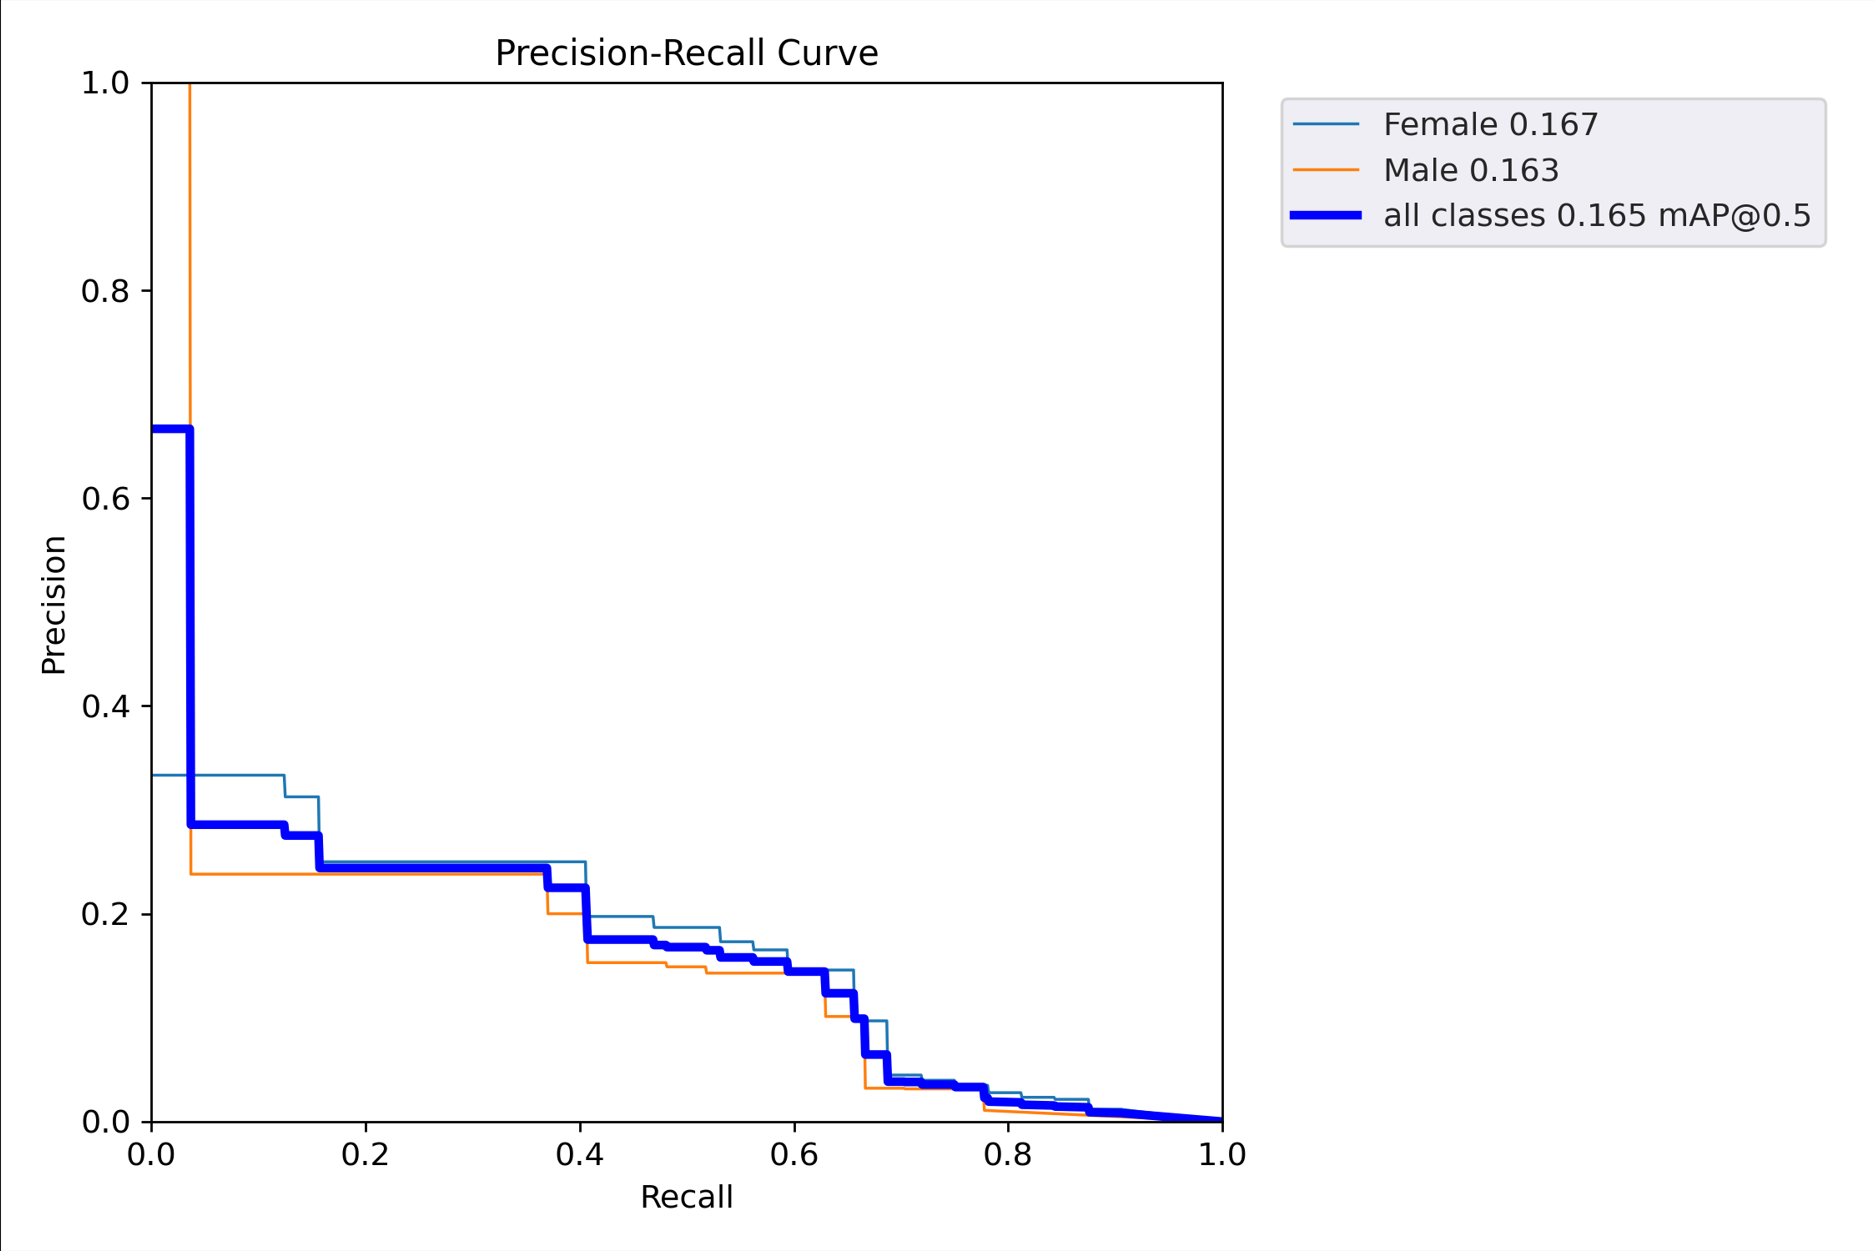

這張圖是 **Precision-Recall Curve**（精確率-召回率曲線），用來展示模型的精確率（Precision）與召回率（Recall）之間的關係。
### 圖表元素：
1. **X軸（Recall）**: 召回率，範圍是從 0 到 1，表示模型能夠識別出實際正樣本的比例。

2. **Y軸（Precision）**: 精確率，範圍是從 0 到 1，表示模型的預測中，有多少正樣本是正確的。

3. **圖例**:
   - `Female 0.167`（淺藍色線）表示女性類別的精確率和召回率曲線，mAP@0.5 為 0.167。
   - `Male 0.163`（橙色線）表示男性類別的精確率和召回率曲線，mAP@0.5 為 0.163。
   - `all classes 0.165`（深藍色線）表示所有類別的整體精確率與召回率曲線，整體 mAP@0.5 是 0.165。

### 圖表解讀：
1. **高召回率 vs 低精確率**：從曲線中可以看到，當召回率提高時（接近1），精確率會逐漸下降。這表明當模型能夠識別更多的正樣本時，也會錯誤地將更多的負樣本識別為正樣本，導致精確率下降。

2. **精確率和召回率的平衡**：這條曲線顯示了模型在不同置信度閾值下，精確率和召回率之間的權衡。對於此模型，無論是女性還是男性類別，在中等置信度範圍內精確率和召回率都較低。

3. **總體 mAP**: 所有類別的平均 mAP@0.5 值約為 0.165，這表示模型的整體性能在這個閾值下的表現。

### 結論：
這張圖表現出模型在精確率和召回率之間存在明顯的權衡。當提高召回率時，精確率會下降，這表明模型的預測中有較多的錯誤預測。